<a href="https://colab.research.google.com/github/DeussTenebris/visual-Intelligence-Project/blob/main/Glasses_or_no_Glasses_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
# Upload the Kaggle API credentials JSON file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gibranandradecuadra","key":"046fb39aafa3edd975d48052bc7a76f7"}'}

In [ ]:
#do not run twice!!
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d adnanzaidi/glasses

 97% 1.00M/1.03M [00:00<00:00, 1.50MB/s]
100% 1.03M/1.03M [00:00<00:00, 1.54MB/s]


In [ ]:
! unzip glasses.zip -d glasses

Archive:  glasses.zip
  inflating: glasses/glasses-noglasses/test/row-1-column-1.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-10.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-2.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-3.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-4.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-5.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-6.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-7.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-8.jpg  
  inflating: glasses/glasses-noglasses/test/row-1-column-9.jpg  
  inflating: glasses/glasses-noglasses/test/row-7-column-1.jpg  
  inflating: glasses/glasses-noglasses/test/row-7-column-10.jpg  
  inflating: glasses/glasses-noglasses/test/row-7-column-2.jpg  
  inflating: glasses/glasses-noglasses/test/row-7-column-3.jpg  
  inflating: glasses/glasses-noglasses/test/row-7-column-4.jpg  
 

In [ ]:
#Imports
from glob import glob
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pylab as plt

CV2 or Matplot

In [ ]:
plt.style.use('ggplot')
glasses_files =glob('/content/glasses/glasses-noglasses/train/glasses/*.jpg')
non_glasses_file =glob('/content/glasses/glasses-noglasses/train/noglasses/*.jpg')
img_mpl = plt.imread(glasses_files[10])
img_cv2 = cv2.imread(glasses_files[10])

img_cv2_ng = cv2.imread(non_glasses_file[10])
img_mpl.shape, img_cv2.shape

((155, 160, 3), (155, 160, 3))

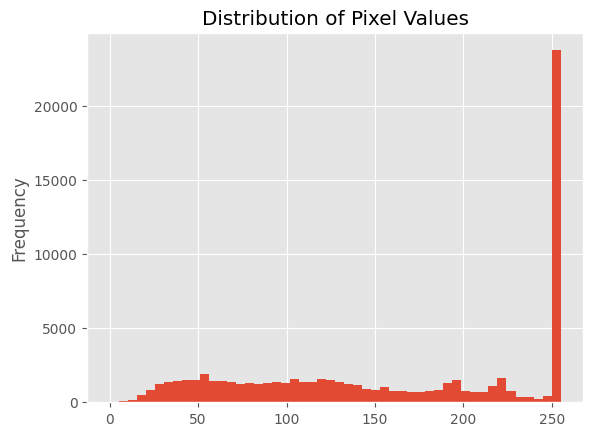

In [ ]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

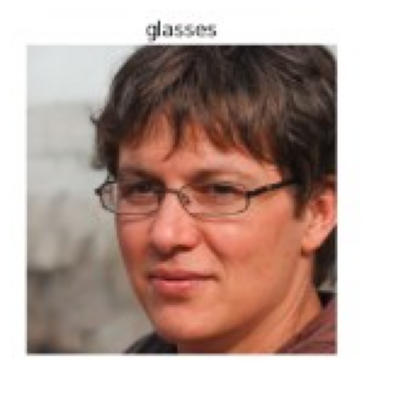

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

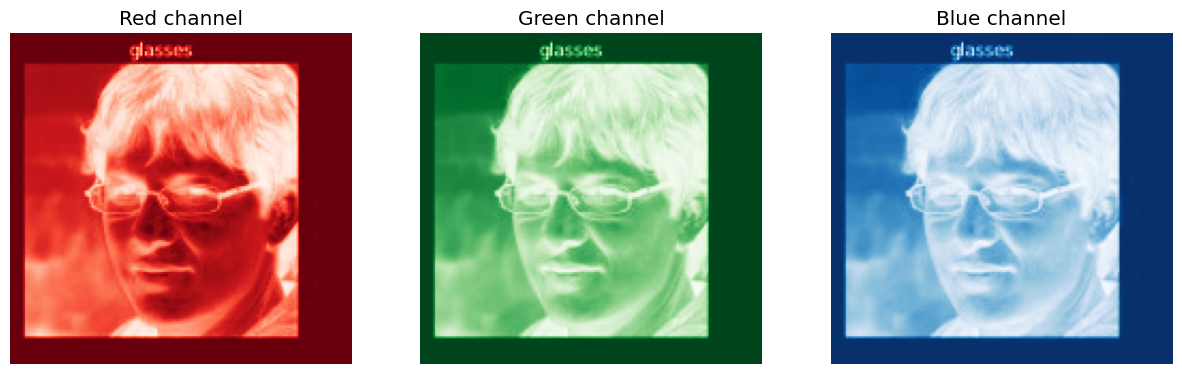

In [ ]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

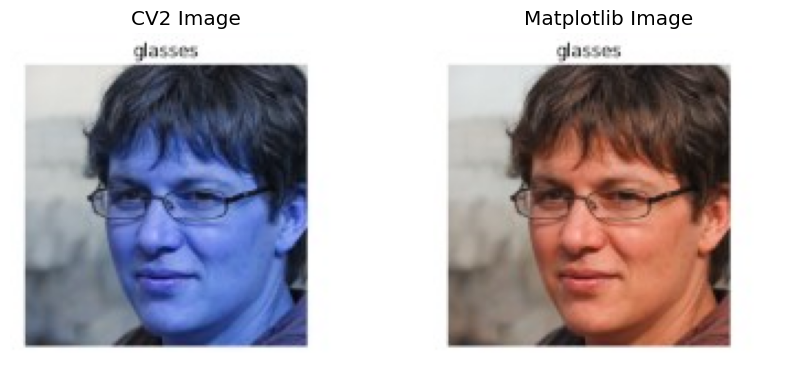

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

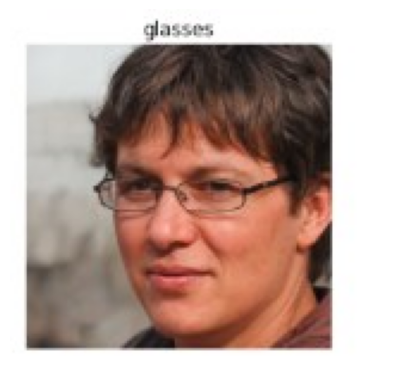

In [ ]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

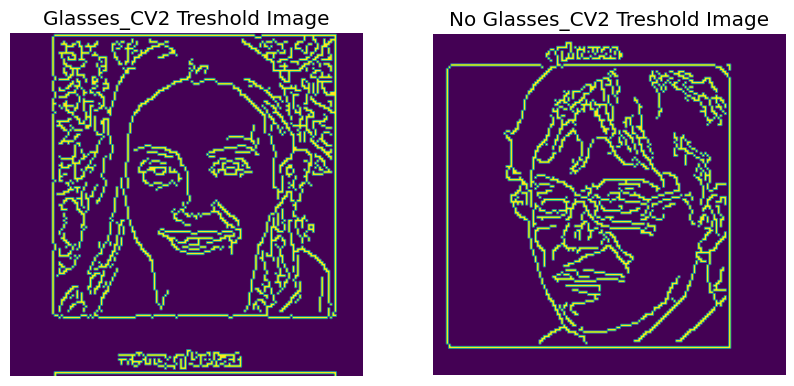

In [ ]:
edges = cv2.Canny(img_cv2,threshold1=0,threshold2=255 )
edges_ng = cv2.Canny(img_cv2_ng,threshold1=0,threshold2=255 )
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_cv2_ng)
axs[1].imshow(edges)
axs[0].imshow(edges_ng)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Glasses_CV2 Treshold Image')
axs[1].set_title('No Glasses_CV2 Treshold Image')
plt.show()

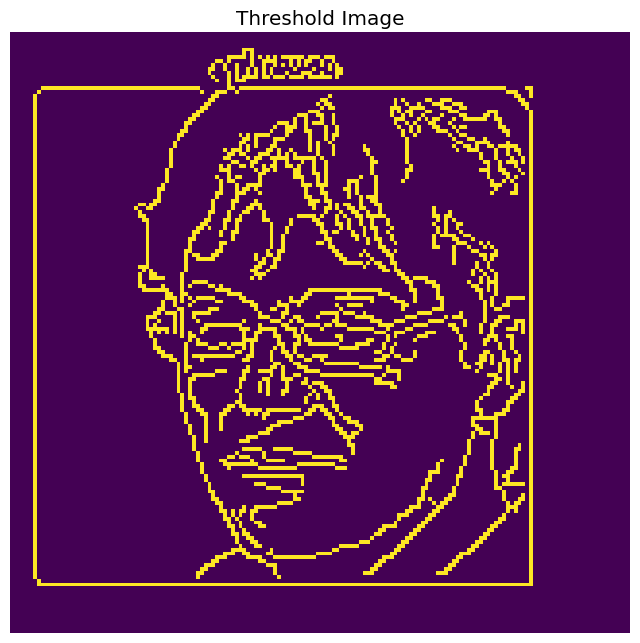

In [ ]:
edges = cv2.Canny(img_cv2,threshold1=0,threshold2=255 )
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(edges)
ax.axis('off')
ax.set_title('Threshold Image')
plt.show()

Normal BGR Images

In [ ]:
#OG VERSION
#define the glasses and no glasses folder
Glasses_folder='/content/glasses/glasses-noglasses/train/glasses'
NoGlasses_folder='/content/glasses/glasses-noglasses/train/noglasses'
#initialize lists to store images and labels
images=[]
labels=[]
#load and preprocess Glasses images
for filename in os.listdir(Glasses_folder):
  if filename.endswith('.jpg'):
    img=cv2.imread(os.path.join(Glasses_folder,filename))
    img=cv2.resize(img,(128,128)) #resize the images
    images.append(img)
    labels.append(0) # 0 represents Glasses!
#load and preprocess no Glasses images
for filename in os.listdir(NoGlasses_folder):
  if filename.endswith('.jpg'):
    img=cv2.imread(os.path.join(NoGlasses_folder,filename))
    img=cv2.resize(img,(128,128))
    images.append(img)
    labels.append(1) # 1 represents no glasses!
#conver lists to Numpy arrays!
images=np.array(images)
labels=np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [ ]:
#KERAS MODEL OG
from operator import mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')])
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(x_train , y_train , epochs=10 , batch_size=32 , validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 768.6436 - accuracy: 0.6061 - val_loss: 927.2933 - val_accuracy: 0.4118
Epoch 2/10
3/3 [==============================] - 2s 452ms/step - loss: 509.5170 - accuracy: 0.4848 - val_loss: 127.9908 - val_accuracy: 0.5882
Epoch 3/10
3/3 [==============================] - 2s 431ms/step - loss: 87.8510 - accuracy: 0.5152 - val_loss: 120.7079 - val_accuracy: 0.4118
Epoch 4/10
3/3 [==============================] - 2s 453ms/step - loss: 83.1666 - accuracy: 0.5152 - val_loss: 2.6660 - val_accuracy: 0.4118
Epoch 5/10
3/3 [==============================] - 2s 431ms/step - loss: 2.0080 - accuracy: 0.5303 - val_loss: 1.2387 - val_accuracy: 0.7647
Epoch 6/10
3/3 [==============================] - 2s 449ms/step - loss: 0.3488 - accuracy: 0.8333 - val_loss: 1.4475 - val_accuracy: 0.8235
Epoch 7/10
3/3 [==============================] - 2s 464ms/step - loss: 0.0653 - accuracy: 0.9697 - val_loss: 3.5054 - val_accuracy: 0.7647
Epoch 8/10


In [ ]:
#evaluating the model BGR
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy= {test_acc}')

1/1 - 0s - loss: 0.0289 - accuracy: 1.0000 - 439ms/epoch - 439ms/step
Test accuracy= 1.0


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
from sklearn.metrics import f1_score

#F1 Score BGR model
predictions = model.predict(x_test)  # Replace x_test with your test data
predicted_labels = np.argmax(predictions, axis=1)
f1 = f1_score(y_test, predicted_labels)
print("F1 Score:", f1)


1/1 [==============================] - 1s 671ms/step
F1 Score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and have predictions and true labels
predictions = model.predict(x_test)  # Replace x_test with your test data
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 213ms/step
Confusion Matrix:
[[11  0]
 [ 0 10]]


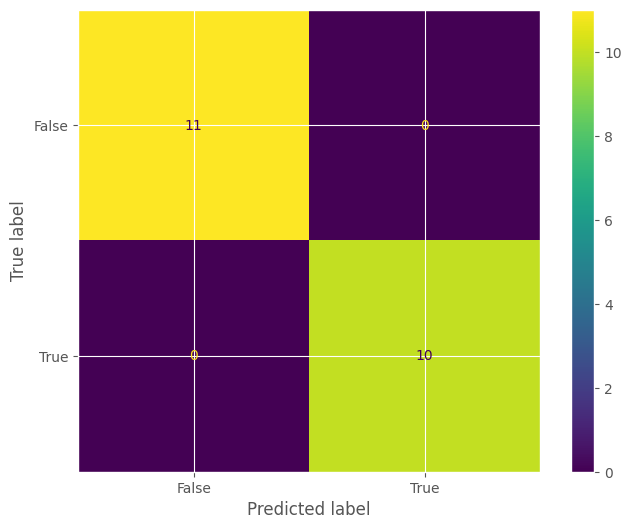

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Adding display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])

# Ploting the confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax)
plt.show()


Using GreySacale

In [ ]:
#Grayscale / Treshold

#define the glasses and no-glasses folder
Glasses_folder = '/content/glasses/glasses-noglasses/train/glasses'
NoGlasses_folder = '/content/glasses/glasses-noglasses/train/noglasses'

#initialize lists to store images and labels
images = []
labels = []

#load and preprocess glasses images
for filename in os.listdir(Glasses_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Glasses_folder, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (128, 128))  # resize the images
        images.append(img)
        labels.append(0)  # 0 represents glasses

#load and preprocess no-glasses images
for filename in os.listdir(NoGlasses_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(NoGlasses_folder, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (128, 128))  # resize the images
        images.append(img)
        labels.append(1)  # 1 represents no glasses

#convert lists to Numpy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)

In [ ]:
#KERAS MODEL Greyscale
from operator import mod
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')])
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(x_train , y_train , epochs=10 , batch_size=32 , validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 4s 512ms/step - loss: 554.9139 - accuracy: 0.5152 - val_loss: 464.9732 - val_accuracy: 0.4118
Epoch 2/10
3/3 [==============================] - 1s 429ms/step - loss: 273.0044 - accuracy: 0.4848 - val_loss: 40.0856 - val_accuracy: 0.5882
Epoch 3/10
3/3 [==============================] - 2s 621ms/step - loss: 26.8873 - accuracy: 0.5303 - val_loss: 7.5364 - val_accuracy: 0.7647
Epoch 4/10
3/3 [==============================] - 2s 580ms/step - loss: 1.9152 - accuracy: 0.8788 - val_loss: 3.2157 - val_accuracy: 0.7647
Epoch 5/10
3/3 [==============================] - 1s 426ms/step - loss: 0.8426 - accuracy: 0.9091 - val_loss: 9.2944 - val_accuracy: 0.5294
Epoch 6/10
3/3 [==============================] - 1s 426ms/step - loss: 2.1470 - accuracy: 0.7273 - val_loss: 4.9911 - val_accuracy: 0.7059
Epoch 7/10
3/3 [==============================] - 1s 406ms/step - loss: 2.3808 - accuracy: 0.8030 - val_loss: 3.6519 - val_accuracy: 0.8824
Epoch 8/10
3

In [ ]:
#evaluating the model GreyScale
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy= {test_acc}')

1/1 - 0s - loss: 0.3395 - accuracy: 0.9048 - 254ms/epoch - 254ms/step
Test accuracy= 0.9047619104385376


In [ ]:
#Example: predicting on a single image
sample_image=x_test[8] #replace with your image data!
predictions=model.predict(np.expand_dims(sample_image,axis=0))
predicted_lable=np.argmax(predictions)

#you can interpret the lable with yousing your dataset's class lables (0 for cats ,1 for dogs)
class_lables=['Glasses','no Glasses']
predicted_class=class_lables[predicted_lable]
print(f'predicted_class: {predicted_class}')

1/1 [==============================] - 0s 43ms/step
predicted_class: Glasses


In [ ]:
from sklearn.metrics import f1_score

#F1 Score GrayScale model
predictions = model.predict(x_test)  # Replace x_test with your test data
predicted_labels = np.argmax(predictions, axis=1)
f1 = f1_score(y_test, predicted_labels)
print("F1 Score:", f1)

1/1 [==============================] - 1s 505ms/step
F1 Score: 0.9


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and have predictions and true labels
predictions = model.predict(x_test)  # Replace x_test with your test data
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 219ms/step
Confusion Matrix:
[[10  1]
 [ 1  9]]


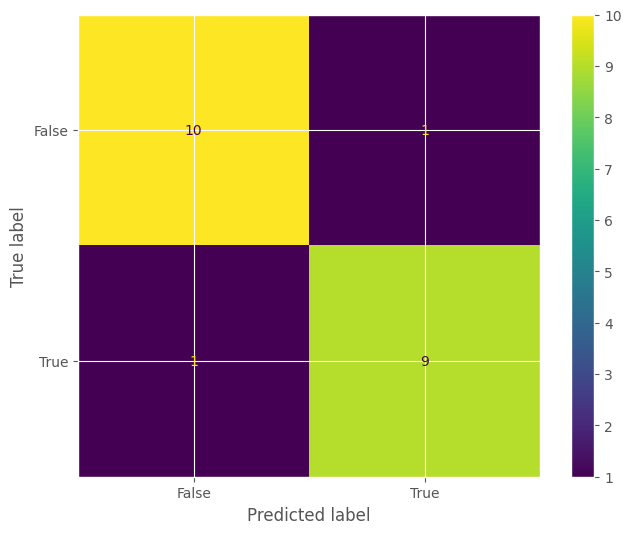

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Adding display
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[False, True])

# Ploting the confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax)
plt.show()


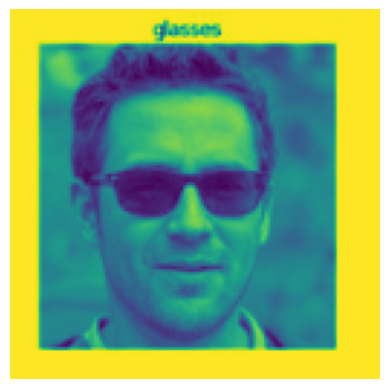

In [ ]:
import matplotlib.pyplot as plt
#Display the sample image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
img_bgr=cv2.imread('/content/drive/MyDrive/NN assignments/d1.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)) #convert BGR color to RGB
#plt.imshow(img_bgr)
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score

# Define a function to calculate F1 score
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

# Define the Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model with the F1 score metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[f1_metric])


In [ ]:
#test from out of our dataset
uploaded=files.upload()

Saving pexels-mart-production-7089020.jpg to pexels-mart-production-7089020.jpg


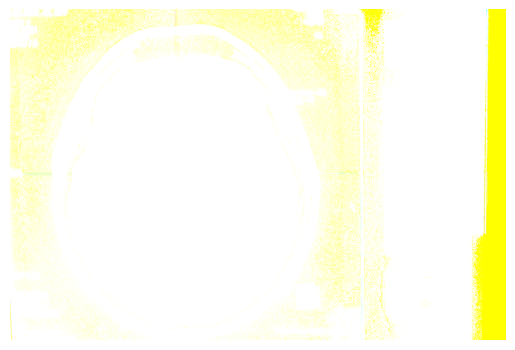

In [ ]:
img_bgr = cv2.imread('/content/pexels-mart-production-7089020.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb.astype(float))
plt.axis('off')
plt.show()


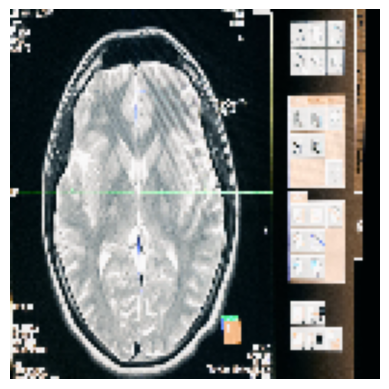

In [ ]:
uploaded_image=cv2.resize(img_bgr,(128,128))
#uploaded_image=cv2.cvtColor(uploaded_image,cv2.COLOR_BGR2RGB)
plt.imshow(uploaded_image)
plt.axis('off')
plt.show()

In [ ]:
#comparing both libraries
img_mpl = plt.imread(trainA_files[20])
img_cv2 = cv2.imread(trainA_files[20])
img_mpl.shape, img_cv2.shape

In [ ]:
uploaded_image=uploaded_image.astype('float32') / 255.0
uploaded_image=np.expand_dims(uploaded_image,axis=0)
predictions=model.predict(uploaded_image)
predicted_lable=np.argmax(predictions)

1/1 [==============================] - 0s 116ms/step


In [ ]:
class_lables=['CT','MRI']
predicted_class=class_lables[predicted_lable]
print(f'predicted_class: {predicted_class}')

predicted_class: MRI


In [ ]:
#PYTORCH

In [ ]:
img_mpl

In [ ]:
img_mpl.max()

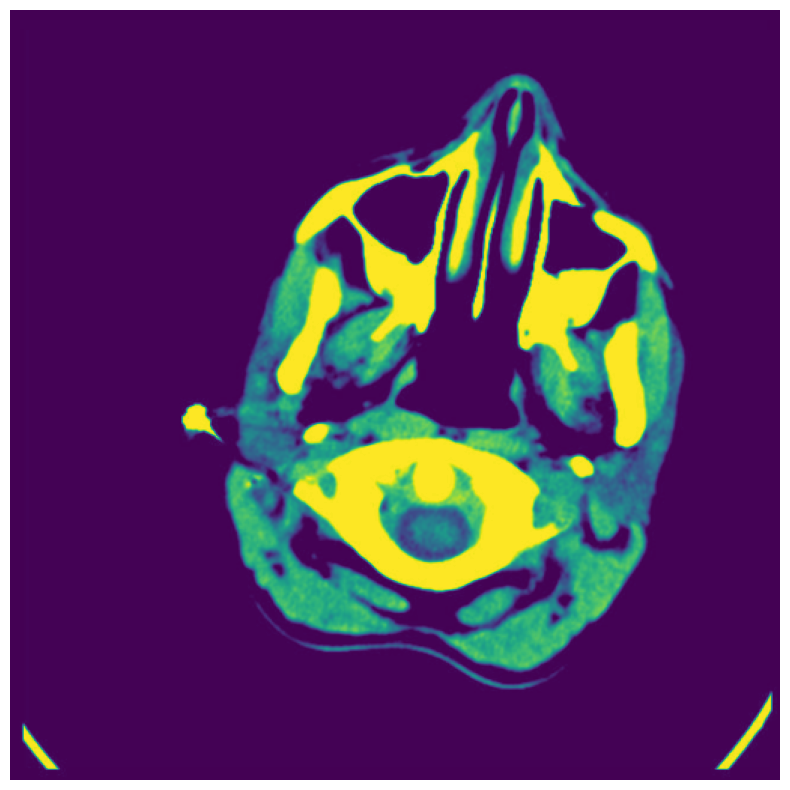

In [ ]:
fig,ax = plt.subplots(figsize = (10,10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()